### Rutgers Physics 441/541 Spring 2020: Problem Set 1, Question 6

Let's expand the Lane-Emden equation, giving 
$$
\frac{1}{\xi^2}\left(\xi^2 \frac{d^2\theta}{d\xi^2} + 2 \xi \frac{d\theta}{d\xi}\right) 
= \frac{d^2\theta}{d\xi^2} + \frac{2}{\xi} \frac{d\theta}{d\xi}
= -\theta^n
$$
So we now have a second-order differential equation for $\theta$. This is just like a dynamics problem,
for which we might consider the position, its first derivative (velocity), and its second derivative 
(acceleration), and where the acceleration is given by the net force which might be a function of 
position and velocity.

I'm going to simplify my notation, using a prime to mean $d/d\xi$, and solve for the "acceleration":
$$
\theta'' = -(2/\xi)\theta' - \theta^n
$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

The first (simpler) method we will use, is to just set up arrays for $\xi$, $\theta$, $\theta'$, and $\theta''$.
Starting at the center ($\xi = 0$), we will set boundary conditions $\theta = 1$ and $\theta' = 0$. From that we can calculate $\theta''$ at the center using the equation above (though we have to watch out for a division by zero
error right at the center). Then we can update our "next" values of $\theta'$ and $\theta$ as follows
$$
\frac{d\theta'}{d\xi} = \theta'' \quad \Longrightarrow \quad \Delta \theta' = \theta'' \Delta \xi
\quad \Longrightarrow \quad \theta'_{i+1} = \theta'_i + \Delta \theta' = \theta'_i + \theta'' \Delta \xi \\
\frac{d\theta}{d\xi} = \theta' \quad \Longrightarrow \quad \Delta \theta = \theta' \Delta \xi
\quad \Longrightarrow \quad \theta_{i+1} = \theta_i + \Delta \theta = \theta_i + \theta' \Delta \xi
$$

In [2]:
def lane_emden(n, dxi=0.0001):
    """ Integrates Lane-Emden equation 
    
        Args:
            n: index of Lane-Emden equation
            dxi: step size in dimensionless radius xi (default: 0.0001)
                 can increase this if things are too slow

        Returns:
            numpy arrays of xi, theta, theta', dxi 
    """
    
    # make a xi array from 0 to 10 with steps=dxi, give a little extra padding at the end
    xi = np.arange(0.,10.1,dxi)
    theta = np.ones_like(xi)   # theta with same length as xi, theta = 1 at the center
    dtdx = np.zeros_like(xi)   # theta' with same length, theta' = 0 at the center
    d2tdx2 = -np.ones_like(xi) # theta'' = -1 at center
    # we could have calculated theta'' but this avoids division by zero at the center

    i = 1  #
    # we will loop until theta becomes negative (we've reached the surface)
    # or if we get to xi > 10.
    while (theta[i-1] >= 0. and xi[i-1] <= 10.):
        theta[i] = theta[i-1] + dtdx[i-1]*dxi
        dtdx[i] = dtdx[i-1] + d2tdx2[i-1]*dxi
        if theta[i] >= 0.: # don't try to raise negative numbers to random powers
            d2tdx2[i] = -2./xi[i]*dtdx[i] - theta[i]**n
        i += 1
    
    # clean up the arrays by cutting out the parts we didn't reach
    xi = xi[:i-1]
    theta = theta[:i-1]
    dtdx = dtdx[:i-1]
    d2tdx2 = d2tdx2[:i-1]  # not really necessary since we don't return this array
    
    return xi, theta, dtdx, dxi

For part (a), we just need to plot $\theta$ vs $\xi$ for a range of $n$ values:

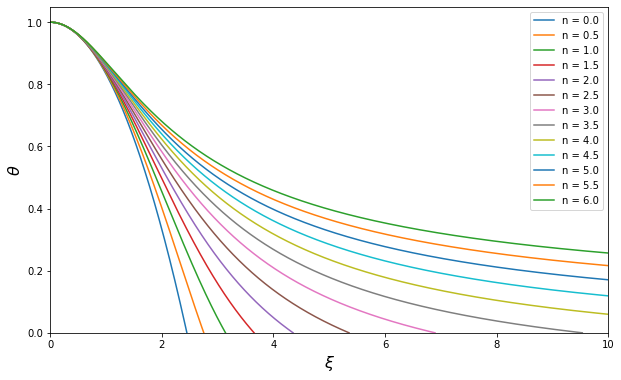

In [4]:
narray = np.linspace(0.,6.,13)

fig = plt.figure(figsize=(10,6))

for n in narray:
    xi, theta, dtdx, dxi = lane_emden(n)
    plt.plot(xi,theta,label="n = {:.1f}".format(n))

plt.legend(loc='upper right')
plt.xlim(0,10)
plt.ylim(ymin=0)
plt.xlabel(r'$\xi$',fontsize=16)
plt.ylabel(r'$\theta$',fontsize=16)
#plt.savefig('sol01q6a.pdf')
plt.show()

For part (b), we use the fact that our last element in the array is at the surface.
Note that I should have just saved the arrays from before rather than recomputing them every time,
but it's quick enough.

In [5]:
narray = np.linspace(0.,3.5,8)

print(" n     xi_1     -xi_1^2 theta'_{xi_1}    rho_c/rho_avg   Pc/(GM^2/R^4)")
for n in narray:
    xi, theta, dtdx, dxi = lane_emden(n)
    xi1 = xi[-1]   # note python syntax: array[-1] returns the last element
    mn = -xi1**2 * dtdx[-1]
    dn = -xi1 / 3. / dtdx[-1]
    wn = 1. / (4. * np.pi * (n + 1.) * dtdx[-1]**2 )
    print("{:.1f} {:8.4f} {:16.4f} {:21.4f} {:15.4f}".format(n,xi1,mn,dn,wn))


 n     xi_1     -xi_1^2 theta'_{xi_1}    rho_c/rho_avg   Pc/(GM^2/R^4)
0.0   2.4495           4.8990                1.0000          0.1194
0.5   2.7527           3.7889                1.8350          0.2122
1.0   3.1415           3.1417                3.2895          0.3926
1.5   3.6536           2.7141                5.9899          0.7700
2.0   4.3527           2.4110               11.4014          1.6380
2.5   5.3550           2.1871               23.4038          3.9086
3.0   6.8966           2.0181               54.1800         11.0504
3.5   9.5356           1.8904              152.8857         40.9127


For part (c), we can do something very similar to part (a).

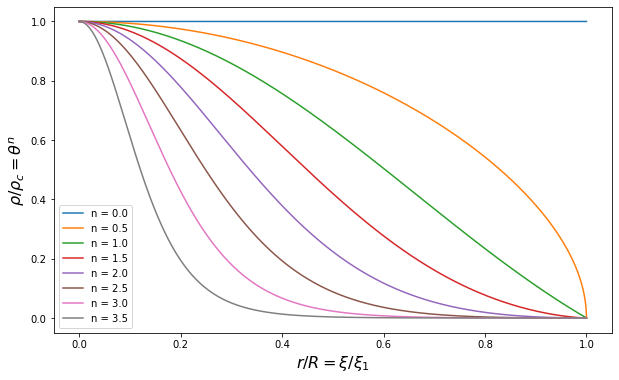

In [7]:
narray = np.linspace(0.,3.5,8)

fig = plt.figure(figsize=(10,6))

for n in narray:
    xi, theta, dtdx, dxi = lane_emden(n)
    rR = xi/xi[-1]
    rhorhoc = theta**n 
    plt.plot(rR,rhorhoc,label="n = {:.1f}".format(n))

plt.legend(loc='lower left')
plt.xlabel(r'$r/R = \xi/\xi_1$',fontsize=16)
plt.ylabel(r'$\rho/\rho_c = \theta^n$',fontsize=16)
#plt.savefig('sol01q6c.pdf')
plt.show()

For part (d), to get the enclosed mass, we will need to integrate the density profile, with
$$
m(r) = \int_0^r 4 \pi u^2 \rho(u) \, du
$$
We could make this whole thing dimensionless to find $m(r)/M$, but note that $m(R) = M$, so we can ignore all the constants (e.g., $4\pi$), integrate the normalized density $\rho/\rho_c = \theta^n$ over $\xi$, and just divide by the maximum value at the end to get the right result.

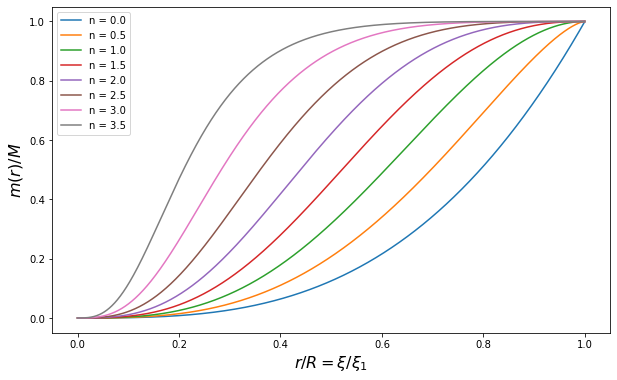

In [8]:
narray = np.linspace(0.,3.5,8)

fig = plt.figure(figsize=(10,6))

for n in narray:
    xi, theta, dtdx, dxi = lane_emden(n)
    rR = xi/xi[-1]
    rhorhoc = theta**n # normalized density
    mr = np.cumsum(rhorhoc * xi**2 * dxi)
    mr /= mr.max() # normalize by the maximum value
    plt.plot(rR,mr,label="n = {:.1f}".format(n))

plt.legend(loc='upper left')
plt.xlabel(r'$r/R = \xi/\xi_1$',fontsize=16)
plt.ylabel(r'$m(r)/M$',fontsize=16)
#plt.savefig('sol01q6d.pdf')
plt.show()

For part (e), to get the pressure profile, we have two choices. We could use hydrostatic equilibrium and integrate the density and enclosed mass, etc. But recall that's what a polytrope model is already doing! In particular we have
$$
P = P_c \theta^{n+1} \quad \Longrightarrow \quad P/P_c = \theta^{n+1}
$$
so plotting the pressure profile is straightforward, just like the density profile from part (c).

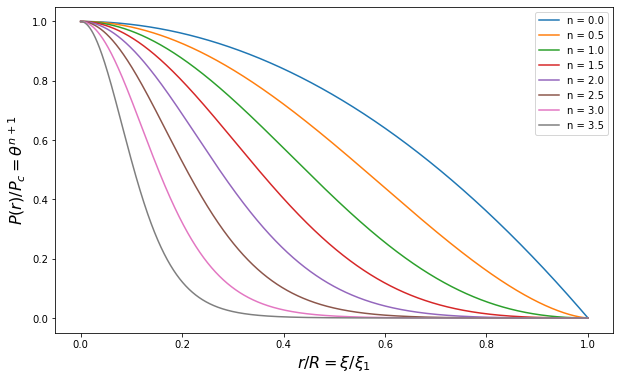

In [9]:
narray = np.linspace(0.,3.5,8)

fig = plt.figure(figsize=(10,6))

for n in narray:
    xi, theta, dtdx, dxi = lane_emden(n)
    rR = xi/xi[-1]
    PPc = theta**(n+1) 
    plt.plot(rR,PPc,label="n = {:.1f}".format(n))

plt.legend(loc='upper right')
plt.xlabel(r'$r/R = \xi/\xi_1$',fontsize=16)
plt.ylabel(r'$P(r)/P_c = \theta^{n+1}$',fontsize=16)
#plt.savefig('sol01q6e.pdf')
plt.show()

For part (f), we can take a numerical derivative of the $P(r)$ curve from part (e) and compare that to $\rho(r) m(r)/r^2$. We will ignore constants so we just expect the ratio to be some constant (negative) value.

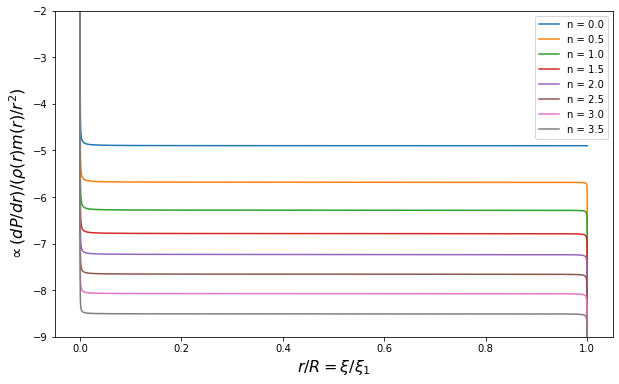

In [10]:
# I will do it for all the n values, but you just needed to pick 1
narray = np.linspace(0.,3.5,8)

fig = plt.figure(figsize=(10,6))

for n in narray:

    xi, theta, dtdx, dxi = lane_emden(n)
    rR = xi/xi[-1]
    PPc = theta**(n+1) 
    dPdr = (PPc[1:] - PPc[:-1])/dxi
    rhorhoc = theta**n # normalized density
    mr = np.cumsum(rhorhoc * xi**2 * dxi)
    mr /= mr.max() # normalize by the maximum value

    ratio = dPdr / (rhorhoc[1:] * mr[1:] / xi[1:]**2)

    plt.plot(rR[1:],ratio,label="n = {:.1f}".format(n))

plt.legend(loc='upper right')
plt.xlabel(r'$r/R = \xi/\xi_1$',fontsize=16)
plt.ylabel(r'$\propto (dP/dr) / (\rho(r) m(r) / r^2)$',fontsize=16)
plt.ylim(-9,-2)
#plt.savefig('sol01q6f.pdf')
plt.show()

Other than some discontinuities at the edges, we see we have hydrostatic equilibrium maintained throughout the star. This kind of diagnostic plot is very useful for numerical work. For example, if you try playing with the stepsize `dxi` = $\Delta \xi$, you will see that increasing it will reduce our fidelity. Below is a plot with `dxi` = 0.01 rather than the default `dxi` = 0.0001.

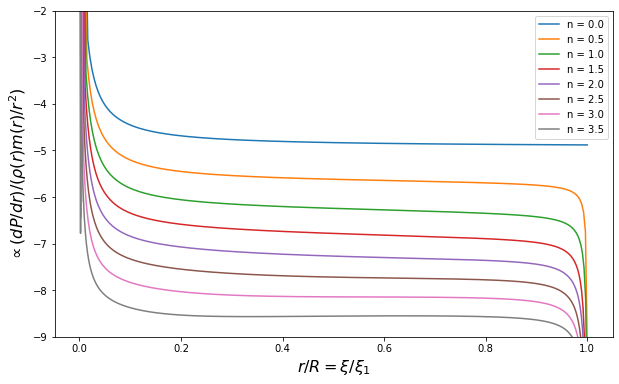

In [11]:
narray = np.linspace(0.,3.5,8)

fig = plt.figure(figsize=(10,6))

for n in narray:

    xi, theta, dtdx, dxi = lane_emden(n,dxi=0.01)
    rR = xi/xi[-1]
    PPc = theta**(n+1) 
    dPdr = (PPc[1:] - PPc[:-1])/dxi
    rhorhoc = theta**n # normalized density
    mr = np.cumsum(rhorhoc * xi**2 * dxi)
    mr /= mr.max() # normalize by the maximum value

    ratio = dPdr / (rhorhoc[1:] * mr[1:] / xi[1:]**2)

    plt.plot(rR[1:],ratio,label="n = {:.1f}".format(n))

plt.legend(loc='upper right')
plt.xlabel(r'$r/R = \xi/\xi_1$',fontsize=16)
plt.ylabel(r'$\propto (dP/dr) / (\rho(r) m(r) / r^2)$',fontsize=16)
plt.ylim(-9,-2)
plt.show()

Finally, the way we did this integration is quite naive. There are much better methods with higher stability and accuracy. A popular choice is Runge-Kutta integration. You can explore some of these choices in the `scipy.integrate`
package.